In [1]:
import numpy as np
class Perceptron:
    """class parameters
    eta: float, learning rate (0.0 to 1.0)
    n_iter: int, number of iterations
    random_state: int, random number generator seed for random weight initialization
    """
    def __init__(self, eta=0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = X.shape[1])
        self.b_ = np.float64(0.)
        self.errors_ = []
        self.w_history = []
        self.b_history = []
        self.w_history.append(self.w_)
        self.b_history.append(self.b_)
        self.update = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
                self.w_history.append(self.w_)
                self.b_history.append(self.b_)
                self.update.append(update)
            self.errors_.append(errors)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1 ,0)

v1 = np.array([1,2,3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))




np.float64(0.0)

In [4]:
import os
import pandas as pd
s = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
print("From URL:", s)
df = pd.read_csv(s, header= None, encoding = 'utf-8')

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


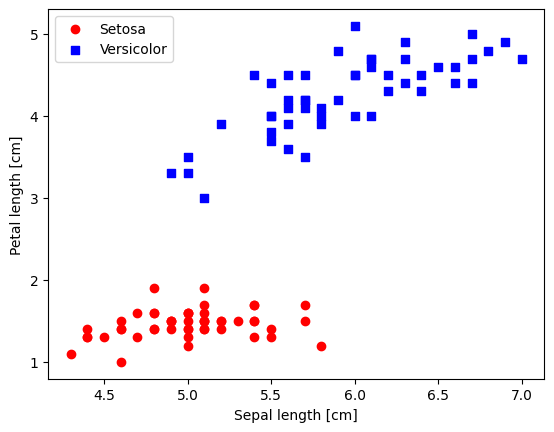

In [5]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0 ,1)

X = df.iloc[0:100, [0,2]].values

plt.scatter(X[:50, 0], X[:50, 1], color = "red", marker = 'o', label = 'Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'b', marker = 's', label = 'Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc = 'upper left')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

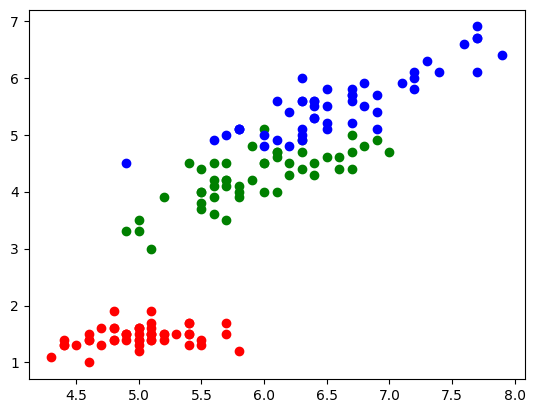

In [6]:
plt.scatter(df.iloc[0:50, 0].values, df.iloc[0:50, 2].values, color = 'r')
plt.scatter(df.iloc[50:100, 0].values, df.iloc[50:100, 2].values, color = 'g')
plt.scatter(df.iloc[100:149, 0].values, df.iloc[100:149, 2].values, color= 'b')
plt.show


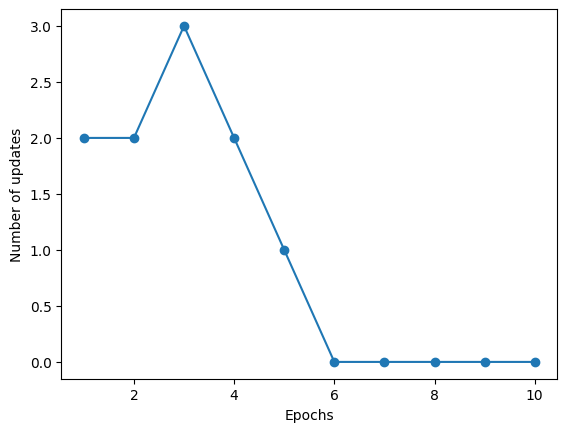

In [7]:
ppn = Perceptron(eta=0.1, n_iter = 10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker = 'o')
plt.xlabel("Epochs")
plt.ylabel("Number of updates")
plt.show()

In [8]:
from matplotlib.colors import ListedColormap
def plot_decision_region(X, y, classifier, resolution = 0.02):
    markers = ('o','s','^','v','<')
    colors = ('r', 'b', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:,0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:, 1].max() + 1
    xx1, xx2= np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y = X[y == cl, 1],
                    alpha = 0.8, c = colors[idx],
                    marker = markers[idx], label = f'Class {cl}',
                    edgecolor='black')

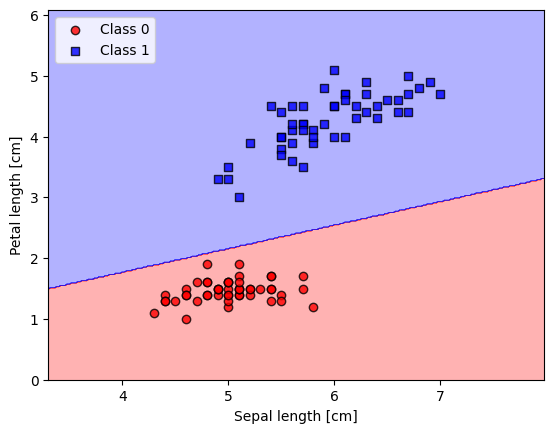

In [9]:
plot_decision_region(X, y, classifier = ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()

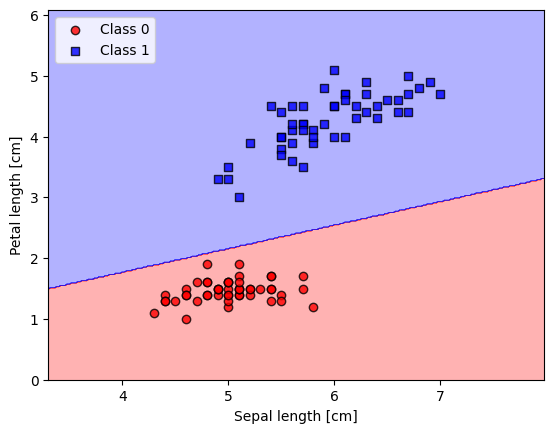

In [10]:
plot_decision_region(X, y, classifier = ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()

In [11]:
class AdalineGD:

    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = X.shape[1])
        self.b_ = np.float64(0.)
        self.losses_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors =(y- output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

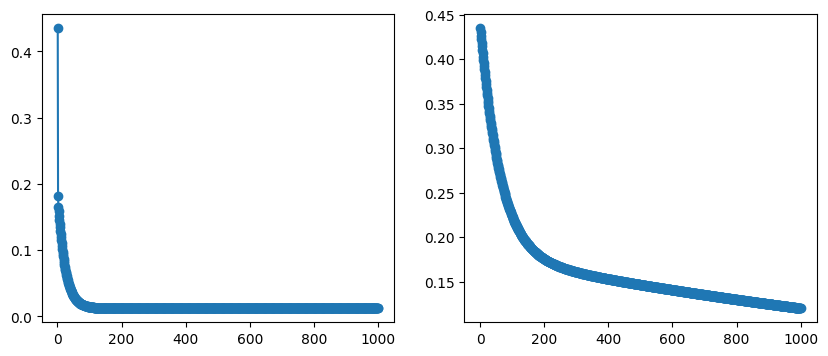

In [12]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
ada1 = AdalineGD(n_iter = 1000, eta = 0.01).fit(X,y)
ax[0].plot(range(1, len(ada1.losses_)+1),ada1.losses_, marker = 'o')
ada2 = AdalineGD(n_iter = 1000, eta = 0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker = 'o')
plt.show()


In [13]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:,0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:,1].std()

ada_gd = AdalineGD(n_iter =20, eta = 0.5)
ada_gd.fit(X_std, y)

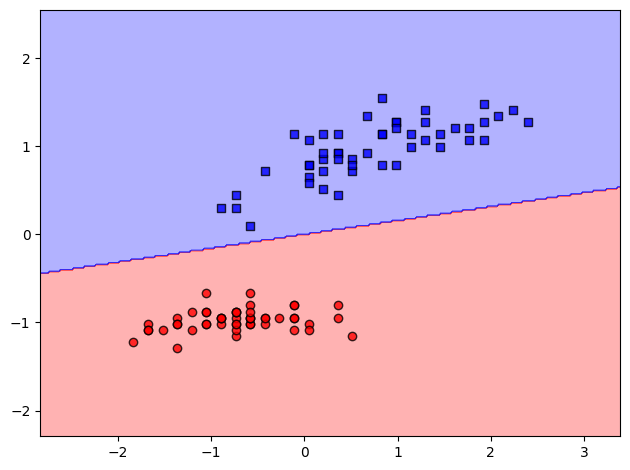

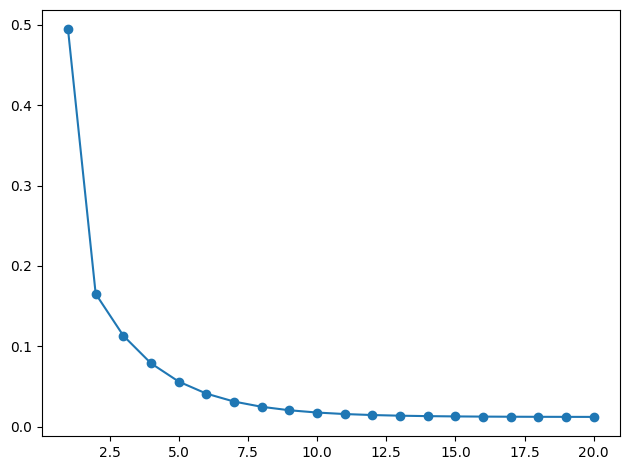

In [16]:
plot_decision_region(X_std, y , classifier = ada_gd)
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker = 'o')
plt.tight_layout()
plt.show()